# **Titanic Passanger Survival Analysis**

## **Bài làm**

### Import thư viện cần thiết

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### **Nạp dữ liệu**

In [372]:
df = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [373]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [375]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


**Vậy tập data có gì?**

*Các biến*

- Survived: 0 = Không, 1 = Có

- pclass: vé hạng nhất = 1st, vé hạng hai = 2nd, vé hạng ba = 3rd

- sibsp: # anh chị em ruột/ vợ/ chồng trên tàu Titanic

- parch: # số lượng cha mẹ / con cái cùng ở trên tàu Titanic.

- ticket: ID của vé

- cabin: Số của cabin

- embarked: Cảng C = Cherbourg, Q = Queenstown, S = Southampton



*Tổng số dòng dữ liệu và cột tên biến*

- Trong tập train gồm: 891 dòng và 12 cột tên biến

- Trong tập test gồm: 418 dòng và 12 cột tên biến

In [376]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [377]:
df_test["Survived"] = ""

In [378]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,


In [379]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Dữ liệu bị thiếu**

Một số dữ liệu trong tập train.csv có giá trị NaN => cần xử lý trước khi train model.

In [380]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Trực quan hóa dữ liệu**

In [381]:
def bar_chart(feature,ti): #Tạo hàm để sử dụng cho các feature phân tích chung với 'Survived'
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    temp = pd.DataFrame([survived,dead]) #Tạo dataframe mới chứa hai series kết hợp lại
    temp.index = ['Sống sót','Tử vong'] #Gán lại 'Survived', 'Dead' để dễ hiểu hơn
    temp.plot(kind='bar',stacked=True, figsize=(10,5),title=ti,rot=45)
    display(temp) #Show dataframe vừa tạo

Sex,female,male
Sống sót,233,109
Tử vong,81,468


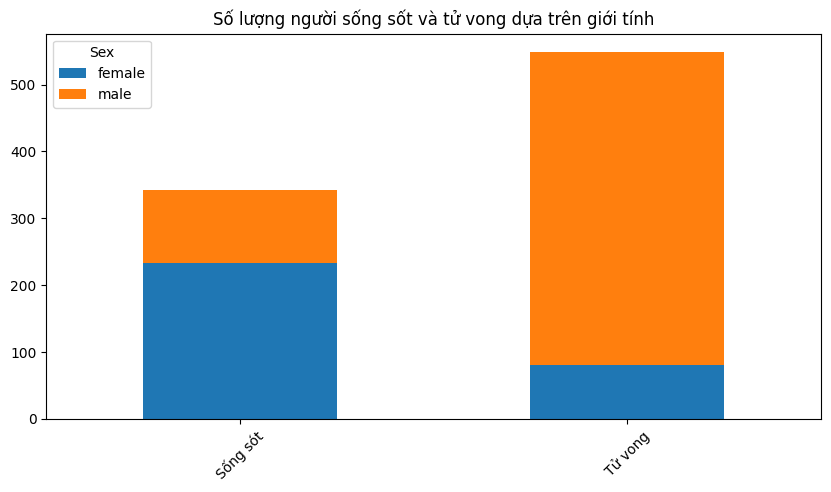

In [382]:
bar_chart('Sex','Số lượng người sống sốt và tử vong dựa trên giới tính')

Bảng dữ liệu cho thấy: ***Phụ nữ có khả năng sống sót cao hơn đàn ông***

Pclass,1,3,2
Sống sót,136,119,87
Tử vong,80,372,97


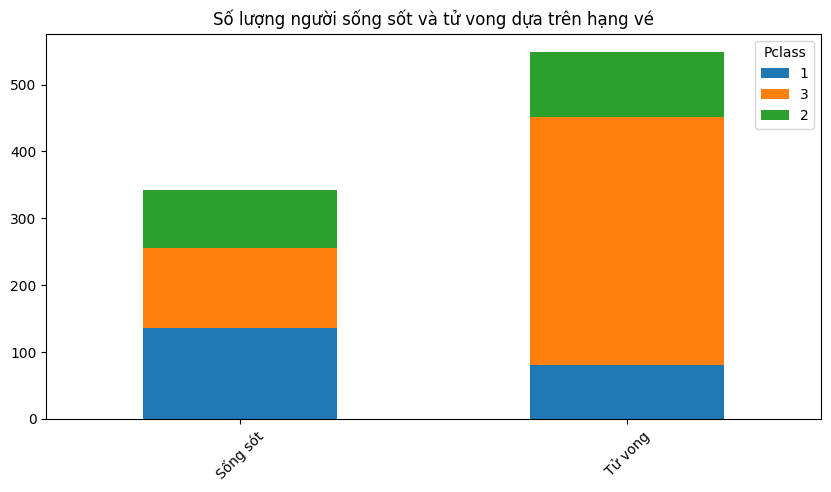

In [383]:
bar_chart('Pclass','Số lượng người sống sốt và tử vong dựa trên hạng vé')

Bảng dữ liệu cho thấy: 

***Phụ nữ có khả năng sống sót cao hơn đàn ông***

vé **hạng nhất** có tỉ lệ sống sót cao hơn các vé *còn lại*

vé **hạng ba** có tỉ lệ chết cao hơn các vé *còn lại*

SibSp,0,1,2,3,4,8,5
Sống sót,210.0,112.0,13.0,4.0,3.0,NaN,NaN
Tử vong,398.0,97.0,15.0,12.0,15.0,7.0,5.0


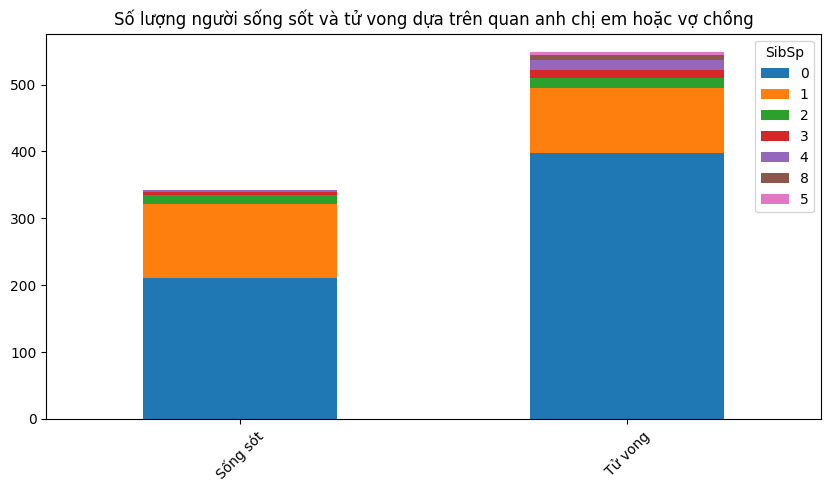

In [384]:
bar_chart('SibSp','Số lượng người sống sốt và tử vong dựa trên quan anh chị em hoặc vợ chồng')

Bảng dữ liệu cho thấy: 

***Phụ nữ có khả năng sống sót cao hơn đàn ông***

Người **có** hơn 2 anh em hoặc là vợ/chồng có tỉ lệ **sống sót cao hơn**

Người **không** anh em hoặc là vợ/chồng có tỉ lệ **chết cao hơn**

Parch,0,1,2,3,5,4,6
Sống sót,233.0,65.0,40.0,3.0,1.0,NaN,NaN
Tử vong,445.0,53.0,40.0,2.0,4.0,4.0,1.0


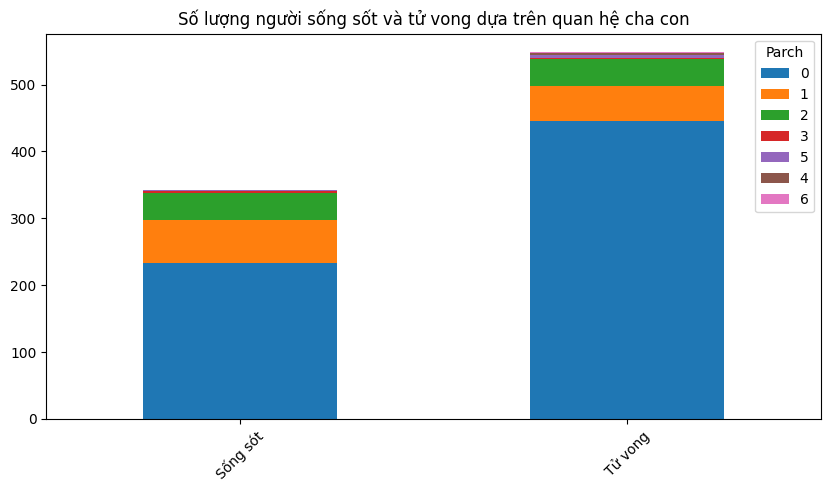

In [385]:
bar_chart('Parch','Số lượng người sống sốt và tử vong dựa trên quan hệ cha con')

Biểu đồ xác nhận một người lên tàu cùng với hơn 2 cha mẹ hoặc con cái có nhiều khả năng **sống sót** hơn.

Biểu đồ xác nhận một người lên tàu một mình có nhiều khả năng **tử vong** hơn.

Embarked,S,C,Q
Sống sót,217,93,30
Tử vong,427,75,47


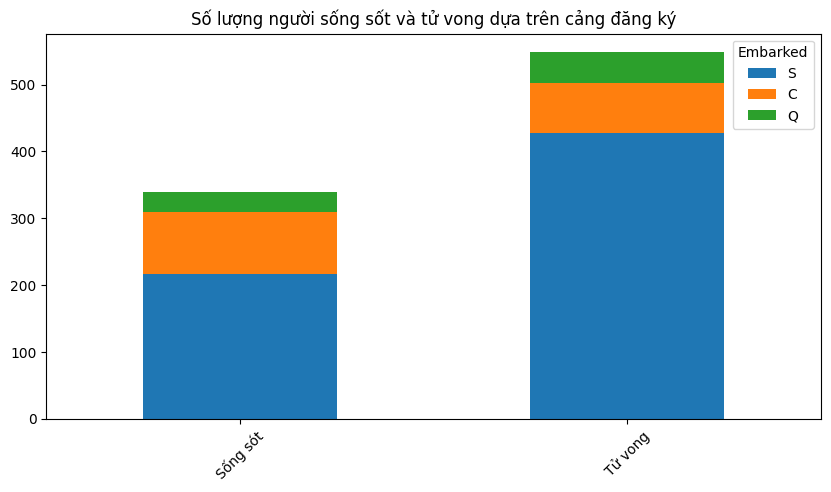

In [386]:
bar_chart('Embarked','Số lượng người sống sốt và tử vong dựa trên cảng đăng ký')

Biểu đồ xác nhận rằng một người lên tàu từ cảng C (Cherbourg) có nhiều khả năng sống sót hơn.

Biểu đồ xác nhận rằng một người lên tàu từ cảng Q (Queenstown) có nhiều khả năng tử vong hơn.

Biểu đồ xác nhận rằng một người lên tàu từ cảng S (Southampton) có nhiều khả năng tử vong hơn.

Có những biến không liên quan đến kết quả predict như là: **PassengerID, Name, Ticket, Fare** vì là các biến là Unique.

### **Xử lý dữ liệu**

In [387]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [388]:
train_test_data = [df,df_test]

for ds in train_test_data:
    ds['Title'] = ds['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [389]:
df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [390]:
mapping_title = {"Mr":0,"Miss":1,"Mrs":2,
                 "Master":3,"Dr":3,"Rev":3,"Col":3,"Mlle":3,"Major":3,
                 "Ms":3,"Mme":3,"Don":3,"Lady":3,"Sir":3,"Dona" : 3, "Capt":3,"Countess":3,"Jonkheer":3}

for ds in train_test_data:
    ds['Title'] = ds["Title"].map(mapping_title)


In [391]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


In [392]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
Title            0
dtype: int64

Title,1,2,0,3
Sống sót,127,99,81,35
Tử vong,55,26,436,32


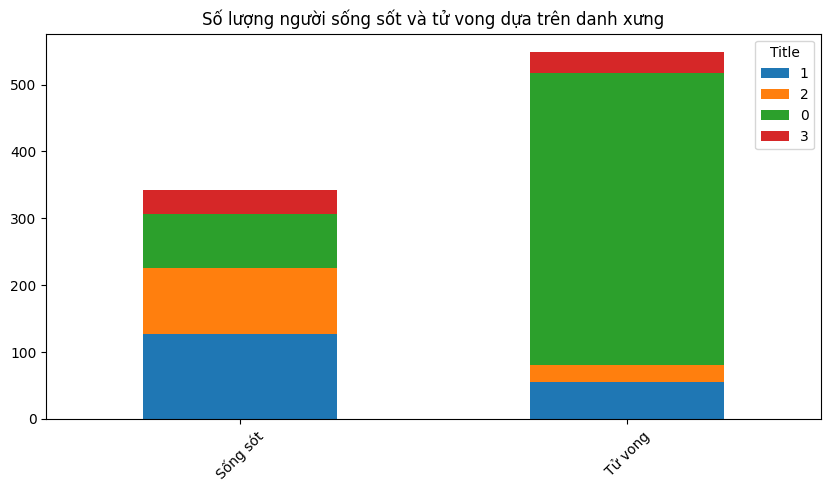

In [393]:
bar_chart('Title','Số lượng người sống sốt và tử vong dựa trên danh xưng')

**Xóa các cột dữ liệu không cần thiết**

In [394]:
df.drop('Name',axis=1,inplace=True)
df_test.drop('Name',axis=1,inplace=True)

In [395]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,2


In [396]:
mapping_gender = {"male":0,"female":1}
for ds in train_test_data:
    ds['Sex'] = ds['Sex'].map(mapping_gender)

Sex,1,0
Sống sót,233,109
Tử vong,81,468


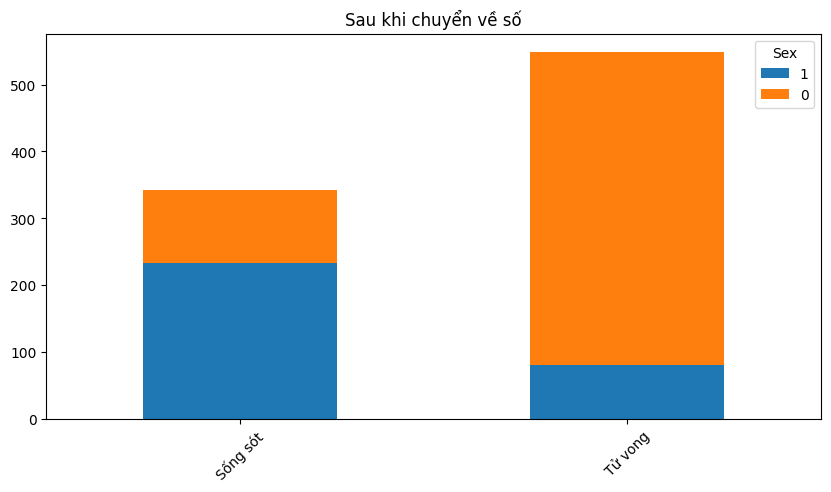

In [397]:
bar_chart('Sex','Sau khi chuyển về số')

In [398]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


**fill NaN cho biến Age dựa vào danh xưng của tên**

In [399]:
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))
df_test['Age'] = df_test['Age'].fillna(df_test.groupby('Title')['Age'].transform('median'))

In [400]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


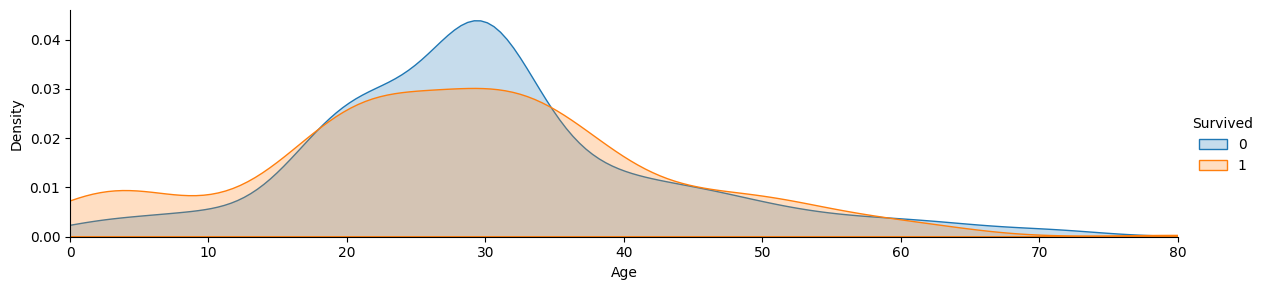

In [401]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend() 
plt.show()

Phần lớn hành khách trên tàu Titanic thuộc nhóm tuổi từ 20 đến 30. Và điều này nghe có hơi mẫu thuẫn, nhưng cũng ở độ tuổi này cũng có tỷ lệ tử vong cao VÀ tỷ lệ sống sót cao.

**Chia tuổi thành các nhóm tuổi** (vì giá trị tuổi hiện tại là biến liên tục có giá trị khác nhau. Khi trực quan hóa, việc đếm số lượng hành khách ở từng tuổi thường không hiệu quả.) VD:

Age,21.0,35.0,30.0,24.0,22.0,36.0,27.0,18.0,19.0,32.0,...,66.0,14.5,70.5,36.5,55.5,20.5,23.5,24.5,34.5,74.0
Sống sót,27.0,25.0,24.0,15.0,11.0,11.0,11.0,9.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tử vong,33.0,10.0,120.0,15.0,16.0,11.0,7.0,17.0,16.0,9.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


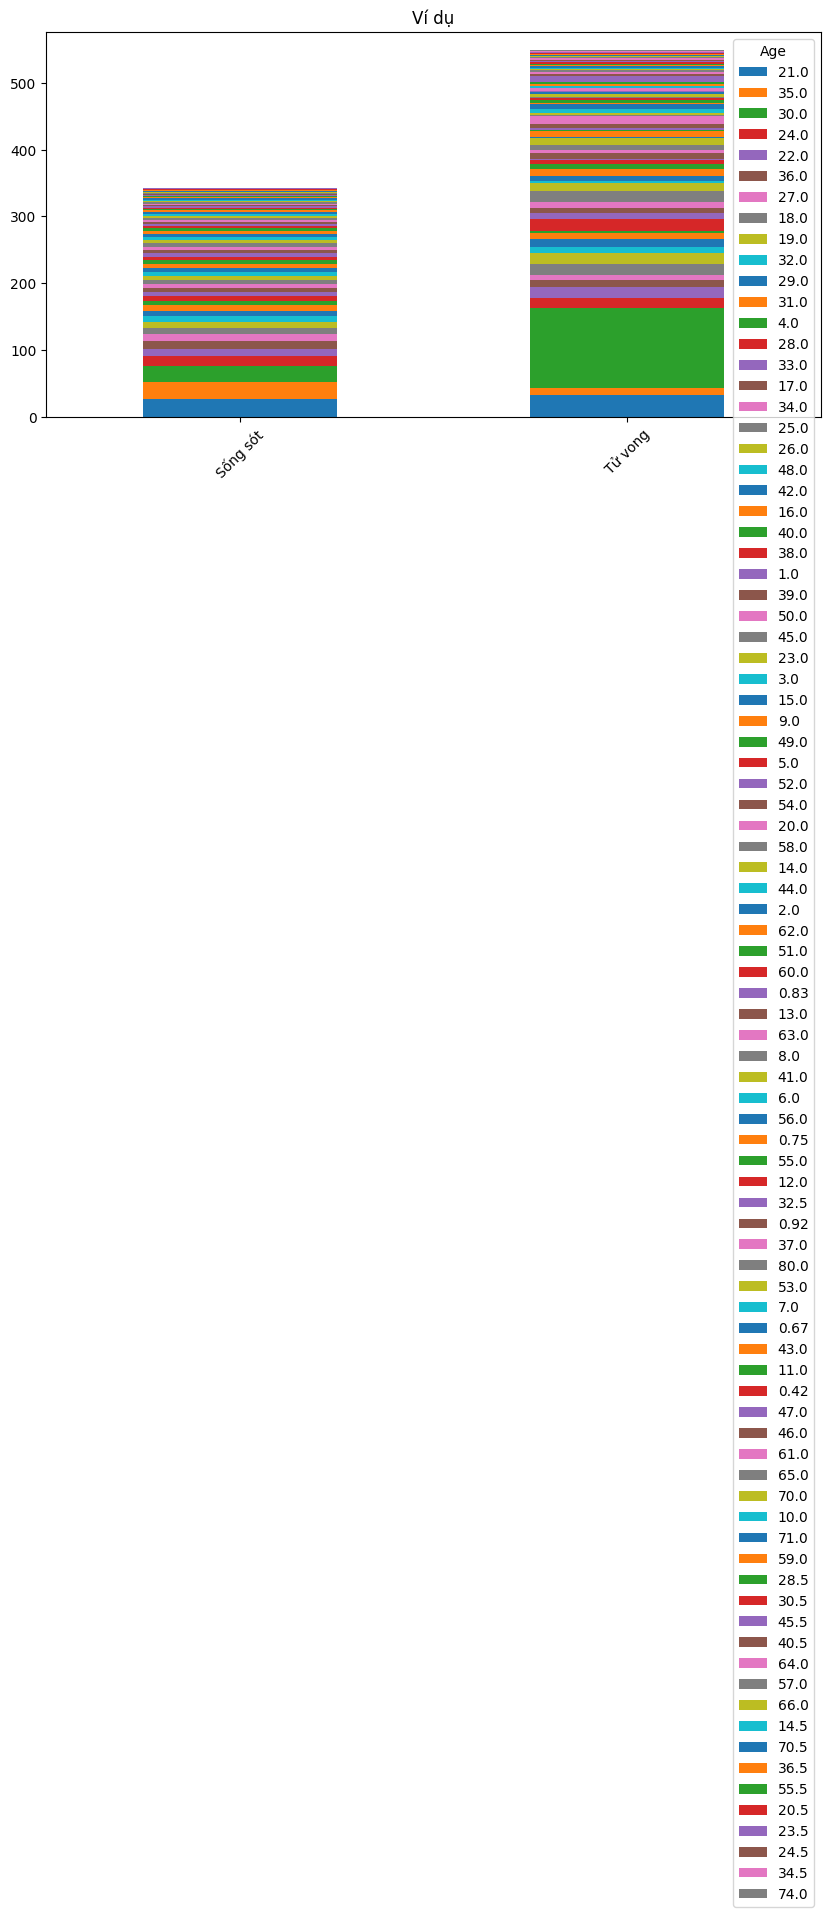

In [402]:
bar_chart('Age','Ví dụ')

Vì vậy ta sẽ chia thành các nhóm tuổi như sau:

- trẻ em (0) : Age <= 16

- người trẻ (1) : Age = 16-26

- người lớn (2) : 26-36

- trung niên (3) : 36-62

- cao tuổi (4) : Age > 62

In [403]:
for dataset in train_test_data:
    #Trẻ em (0) : Age <= 16
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0 
    
    #Người trẻ (1) : 16 < Age <= 26
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    
    #Người lớn (2) : 26 < Age <= 36
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    
    #Trung niên (3) : 36 < Age <= 62
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    
    #Cao tuổi (4) : Age > 62
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [404]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,C,2


Age,2.0,1.0,3.0,0.0,4.0
Sống sót,116,97,69,57,3
Tử vong,220,158,111,48,12


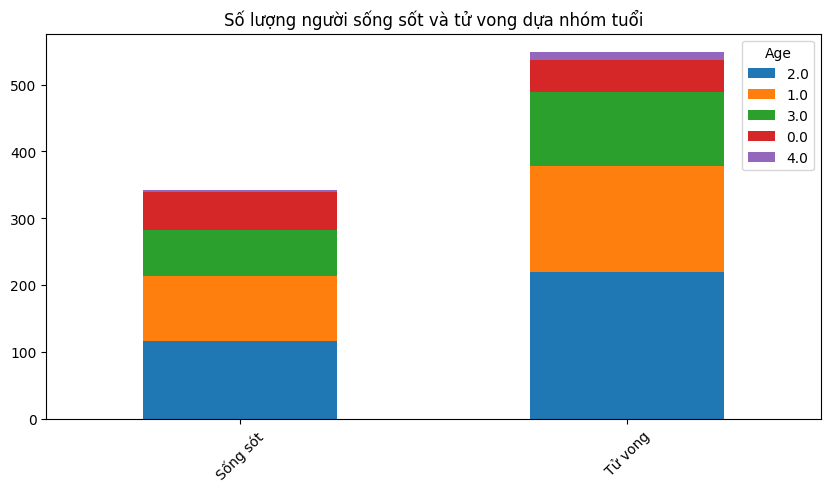

In [405]:
bar_chart('Age','Số lượng người sống sốt và tử vong dựa nhóm tuổi')

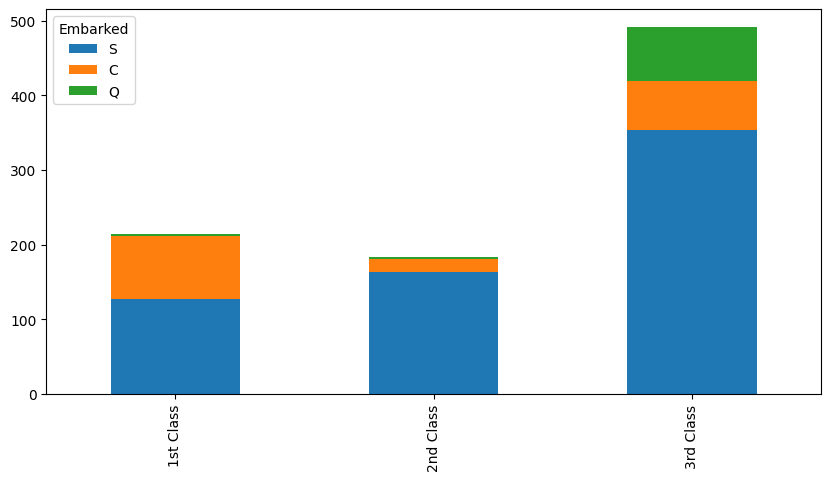

Pclass1:
 Embarked
S    127
C     85
Q      2
Name: count, dtype: int64
Pclass2:
 Embarked
S    164
C     17
Q      3
Name: count, dtype: int64
Pclass3:
 Embarked
S    353
Q     72
C     66
Name: count, dtype: int64


In [406]:
Pclass1 = df[df['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = df[df['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = df[df['Pclass'] == 3]['Embarked'].value_counts()
temp = pd.DataFrame([Pclass1,Pclass2,Pclass3])
temp.index = ['1st Class','2nd Class','3rd Class']
temp.plot(kind = 'bar', stacked =  True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

**Hơn 50% hành khách của mỗi hạng vé (1st, 2nd, 3rd) đều lên tàu từ cảng S (Southampton).** Vì vậy các giá trị NaN của embarked sẽ thay bằng S

In [407]:
for ds in train_test_data:
    ds['Embarked'] = ds['Embarked'].fillna('S')

In [408]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


**Chuyển các giá trị Embarked từ object về float**

In [410]:
mapping_Embarked = {'S':0,'C':1,'Q':2}
for ds in train_test_data:
    ds['Embarked'] = ds['Embarked'].map(mapping_Embarked)

In [411]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


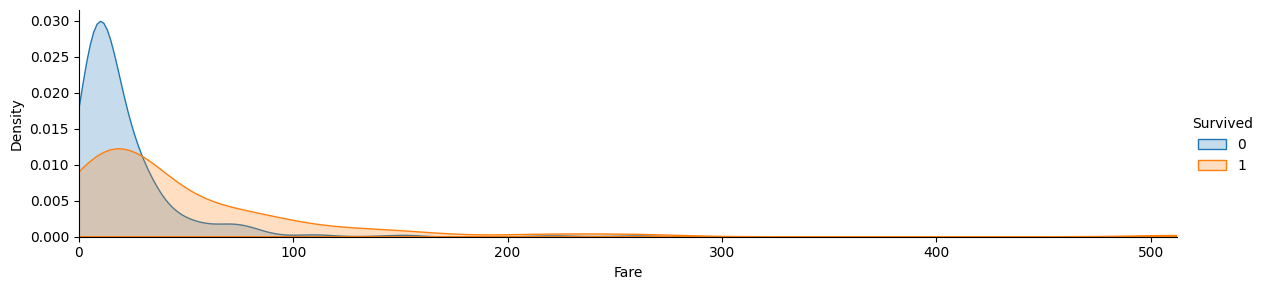

In [412]:
facet = sns.FacetGrid(df,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',fill=True)
facet.set(xlim = (0, df['Fare'].max()))
facet.add_legend()
plt.show()

C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

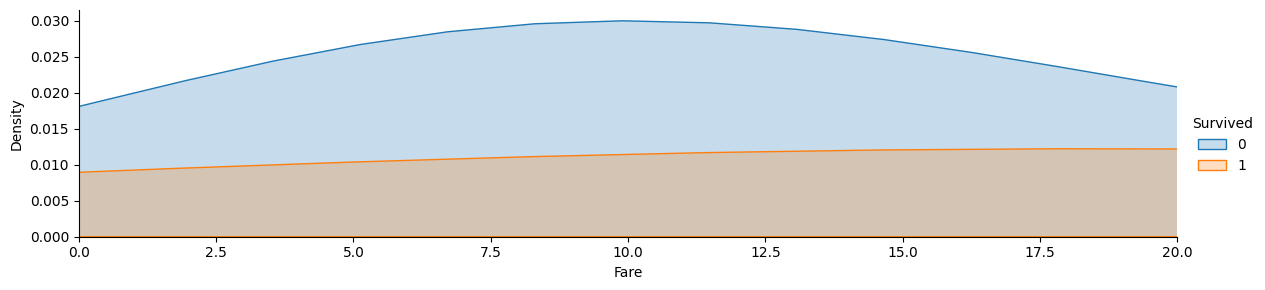

In [413]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(17.0, 30.0)

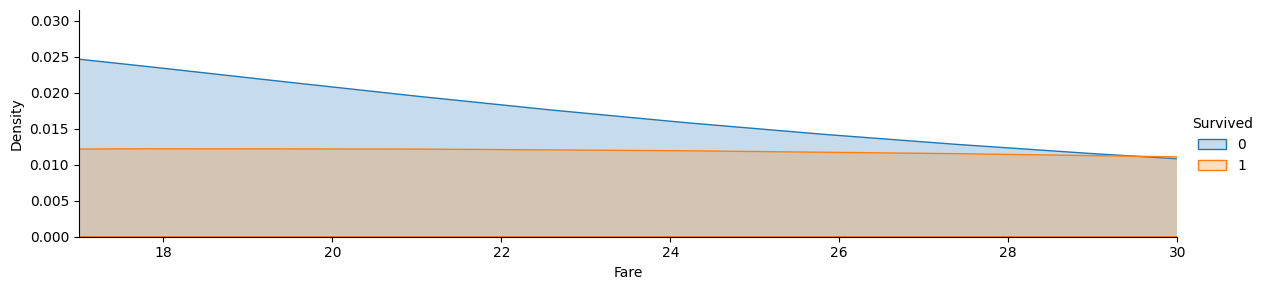

In [414]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
plt.xlim(17, 30)

C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Keqing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(30.0, 100.0)

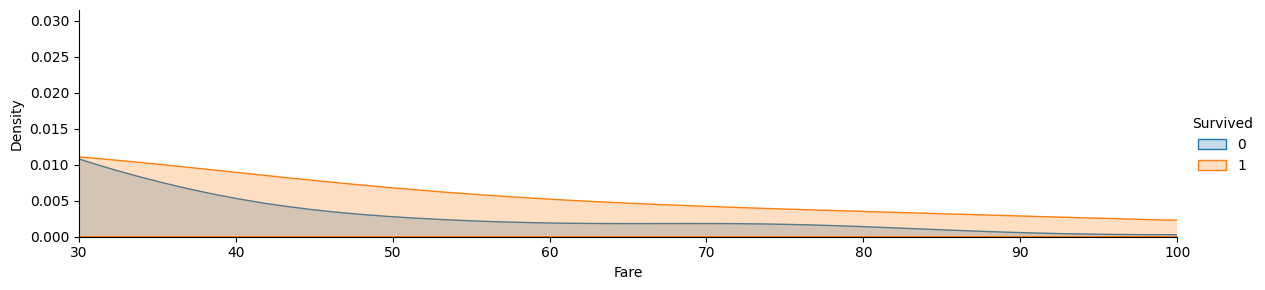

In [415]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
plt.xlim(30, 100)

Các biểu đồ xác nhận rằng giá vé càng **cao** thì khả năng **sống sót** càng lớn.

**Cũng giống như biến Age ta sẽ chuyển giá trị liên tục của fare thành các nhóm giá vé khác nhau**

- 0: dưới 17 giá trị tiền

- 1: 17-30 giá trị tiền

- 2: 30-100 giá trị tiền

- 3: hơn 100 giá trị tiền 

In [416]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[dataset['Fare'] >= 100, 'Fare'] = 3

In [417]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,E46,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,NaN,1,2


In [418]:
df["Fare"].fillna(df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
df_test["Fare"].fillna(df_test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
display(df.isna().sum(),df_test.isna().sum())

C:\Users\Keqing\AppData\Local\Temp\ipykernel_2216\2622574013.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fare"].fillna(df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
C:\Users\Keqing\AppData\Local\Temp\ipykernel_2216\2622574013.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Survived         0
Title            0
dtype: int64

**Vì giá trị cabin thiếu quá nhiều cho nên cũng sẽ drop đi**

In [419]:
df.drop('Cabin',axis=1,inplace=True)
df_test.drop('Cabin',axis=1,inplace=True)

In [420]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,1,2


**Gộp biến SibSp và Parch** vì có liên quan đến nhau. Gộp theo công thức sau:

**FamilySize** = Sibsp + Parch + 1 (Cộng 1 là vì cộng chính hành khách đó)

In [421]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [422]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,0,0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,1,2,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,0,1,1
3,4,1,1,1,2.0,1,0,113803,2.0,0,2,2
4,5,0,3,0,2.0,0,0,373450,0.0,0,0,1
5,6,0,3,0,2.0,0,0,330877,0.0,2,0,1
6,7,0,1,0,3.0,0,0,17463,2.0,0,0,1
7,8,0,3,0,0.0,3,1,349909,1.0,0,3,5
8,9,1,3,1,2.0,0,2,347742,0.0,0,2,3
9,10,1,2,1,0.0,1,0,237736,2.0,1,2,2


(0.0, 11.0)

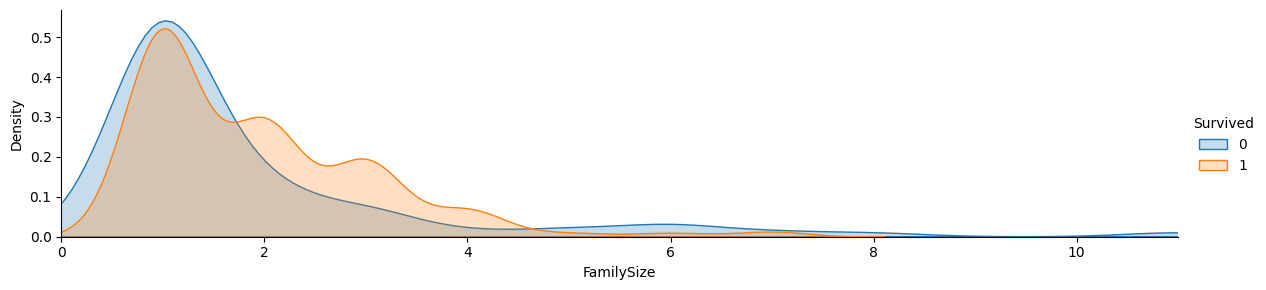

In [423]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',fill=True)
facet.set(xlim=(0, df['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

Biểu đồ này là một bằng chứng rõ ràng cho thấy trong thảm họa Titanic, việc đi cùng gia đình vừa phải (2 đến 4 người) là yếu tố sống sót cao nhất. Biến FamilySize là một đặc trưng dự đoán mạnh mẽ cho mô hình.

In [424]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [425]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,0,0,0.0
5,6,0,3,0,2.0,0,0,330877,0.0,2,0,0.0
6,7,0,1,0,3.0,0,0,17463,2.0,0,0,0.0
7,8,0,3,0,0.0,3,1,349909,1.0,0,3,1.6
8,9,1,3,1,2.0,0,2,347742,0.0,0,2,0.8
9,10,1,2,1,0.0,1,0,237736,2.0,1,2,0.4


In [426]:
features_drop = ['Ticket','SibSp','Parch']
train = df.drop(features_drop,axis=1)
test = df_test.drop(features_drop,axis=1)
train = train.drop(['PassengerId'], axis=1)

*Có 177 giá trị NaN trong Age và 687 giá trị NaN trong Cabin*

In [427]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']
train_data.shape, target.shape

((891, 7), (891,))

In [428]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,0,0,0.4
1,1,1,1,3.0,2.0,1,2,0.4
2,1,3,1,1.0,0.0,0,1,0.0
3,1,1,1,2.0,2.0,0,2,0.4
4,0,3,0,2.0,0.0,0,0,0.0
5,0,3,0,2.0,0.0,2,0,0.0
6,0,1,0,3.0,2.0,0,0,0.0
7,0,3,0,0.0,1.0,0,3,1.6
8,1,3,1,2.0,0.0,0,2,0.8
9,1,2,1,0.0,2.0,1,2,0.4


In [429]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Survived,Title,FamilySize
0,892,3,0,2.0,0.0,2,,0,0.0
1,893,3,1,3.0,0.0,0,,2,0.4
2,894,2,0,3.0,0.0,2,,0,0.0
3,895,3,0,2.0,0.0,0,,0,0.0
4,896,3,1,1.0,0.0,0,,2,0.8
5,897,3,0,0.0,0.0,0,,0,0.0
6,898,3,1,2.0,0.0,2,,1,0.0
7,899,2,0,1.0,1.0,0,,0,0.8
8,900,3,1,1.0,0.0,1,,2,0.0
9,901,3,0,1.0,1.0,0,,0,0.8


### **Modeling**

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
 10  Title        891 non-null    int64  
 11  FamilySize   891 non-null    float64
dtypes: float64(3), int64(8), object(1)
memory usage: 83.7+ KB


### **K-Fold**

In [431]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [432]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.83146067 0.83146067 0.85393258 0.83146067
 0.84269663 0.80898876 0.82022472 0.84269663]


In [433]:
#learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
#     round(np.mean(score)*100,2)
#     print("Score of :\n",score)
model_fit()

Score of Model 0 : 82.94
Score of Model 1 : 80.25
Score of Model 2 : 80.02
Score of Model 3 : 80.13
Score of Model 4 : 83.39
Score of Model 5 : 79.8
Score of Model 6 : 81.37
Score of Model 7 : 81.59
Score of Model 8 : 80.92


In [434]:
clf1 = SVC()
clf1.fit(train_data, target)
test
test_data = test.drop(['Survived','PassengerId'], axis=1)
prediction = clf1.predict(test_data)
# test_data


In [436]:
test_data['Survived'] = prediction
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'], 
    'Survived': prediction
})
submission['Survived'] = submission['Survived'].astype(int)
submission.to_csv("Submission.csv",index=False,header=True)